### NLP Assignment-1

Load data

In [ ]:
!wget https://raw.githubusercontent.com/debajyotimaz/nlp_assignment/main/train_split.csv
!wget https://raw.githubusercontent.com/debajyotimaz/nlp_assignment/main/test_split.csv

--2024-09-25 15:33:18--  https://raw.githubusercontent.com/debajyotimaz/nlp_assignment/main/train_split.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 144474 (141K) [text/plain]
Saving to: ‘train_split.csv.2’

train_split.csv.2   100%[===================>] 141.09K  --.-KB/s    in 0.004s  

2024-09-25 15:33:18 (32.3 MB/s) - ‘train_split.csv.2’ saved [144474/144474]

--2024-09-25 15:33:18--  https://raw.githubusercontent.com/debajyotimaz/nlp_assignment/main/test_split.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35259 (3

In [ ]:
import numpy as np
import pandas as pd
import re
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, confusion_matrix, \
multilabel_confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_data=pd.read_csv("train_split.csv")
train_data.head()

,text,Joy,Fear,Anger,Sadness,Surprise
0,The light would come all the way up to your ve...,0,1,0,0,1
1,"Well, my birthday is in January.",0,0,0,0,0
2,"Tears in my eyes, too much on my mind, and dee...",0,1,0,1,0
3,"My eyes scanned quickly into every room, every...",0,1,1,0,0
4,I felt the afterglow of the late afternoon sun...,1,0,0,0,0


In [ ]:
train_data.describe()

,Joy,Fear,Anger,Sadness,Surprise
count,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.23625,0.581875,0.121875,0.314375,0.308125
std,0.42491,0.493405,0.327244,0.464412,0.461863
min,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,1.000000,0.000000,0.000000,0.000000
75%,0.00000,1.000000,0.000000,1.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
train_data_set=train_data["text"]
train_data_set.head()

,text
0,The light would come all the way up to your ve...
1,"Well, my birthday is in January."
2,"Tears in my eyes, too much on my mind, and dee..."
3,"My eyes scanned quickly into every room, every..."
4,I felt the afterglow of the late afternoon sun...


In [ ]:
train_labels=train_data[train_data.columns[1:]]
train_labels.head()

,Joy,Fear,Anger,Sadness,Surprise
0,0,1,0,0,1
1,0,0,0,0,0
2,0,1,0,1,0
3,0,1,1,0,0
4,1,0,0,0,0


In [ ]:
test_data=pd.read_csv("test_split.csv")
test_data_set=test_data["text"]
test_data_set.head()

,text
0,And they probably knew exactly what your dad saw.
1,"My neck still hurts while I'm working, and I w..."
2,"and Christian fish bumper stickers, it caught ..."
3,It felt so unreal...
4,' To be honest I don't know why I set out into...


In [ ]:
test_data.describe()

,Joy,Fear,Anger,Sadness,Surprise
count,400.00000,400.000000,400.000000,400.000000,400.000000
mean,0.23500,0.580000,0.130000,0.315000,0.310000
std,0.42453,0.494177,0.336725,0.465098,0.463072
min,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,1.000000,0.000000,0.000000,0.000000
75%,0.00000,1.000000,0.000000,1.000000,1.000000
max,1.00000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test_labels=test_data[test_data.columns[1:]]
test_labels.head()

,Joy,Fear,Anger,Sadness,Surprise
0,0,1,0,0,1
1,0,1,1,0,0
2,1,0,0,0,1
3,0,1,0,0,1
4,0,1,0,0,0


In [ ]:
test_features = test_data["text"]
print(test_features.head())
train_features = train_data["text"]

0    And they probably knew exactly what your dad saw.
1    My neck still hurts while I'm working, and I w...
2    and Christian fish bumper stickers, it caught ...
3                                 It felt so unreal...
4    ' To be honest I don't know why I set out into...
Name: text, dtype: object


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

test_features_cleaned = test_features.map(lambda com : clean_text(com))
print(test_features_cleaned.head())
train_features_cleaned = train_features.map(lambda com : clean_text(com))

0     and they probably knew exactly what your dad saw
1    my neck still hurts while i am working and i w...
2    and christian fish bumper stickers it caught m...
3                                    it felt so unreal
4    to be honest i do not know why i set out into ...
Name: text, dtype: object


In [ ]:
!pip install nltk

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    return ' '.join([word for word in tokens if word not in stop_words])

test_features_cleaned = test_features_cleaned.apply(remove_stopwords)
print(test_features_cleaned.head())
train_features_cleaned = train_features_cleaned.apply(remove_stopwords)


0                        probably knew exactly dad saw
1    neck still hurts working hour totally unnecess...
2    christian fish bumper stickers caught eye made...
3                                          felt unreal
4    honest know set dark yesterday letter clutched...
Name: text, dtype: object


In [ ]:
print('Percentage of comments without labels: ')
print(len((train_data[(train_data.Joy == 0) & (train_data.Fear == 0) & (train_data.Sadness == 0) & (train_data.Surprise == 0)])) / len(train_data)*100)
print('Percentage of comments with one or more labels: ')
print(len((train_data[(train_data.Joy == 1) & (train_data.Fear == 1) & (train_data.Sadness == 1) & (train_data.Surprise == 1)])) / len(train_data)*100)

Percentage of comments without labels: 
10.5
Percentage of comments with one or more labels: 
0.25


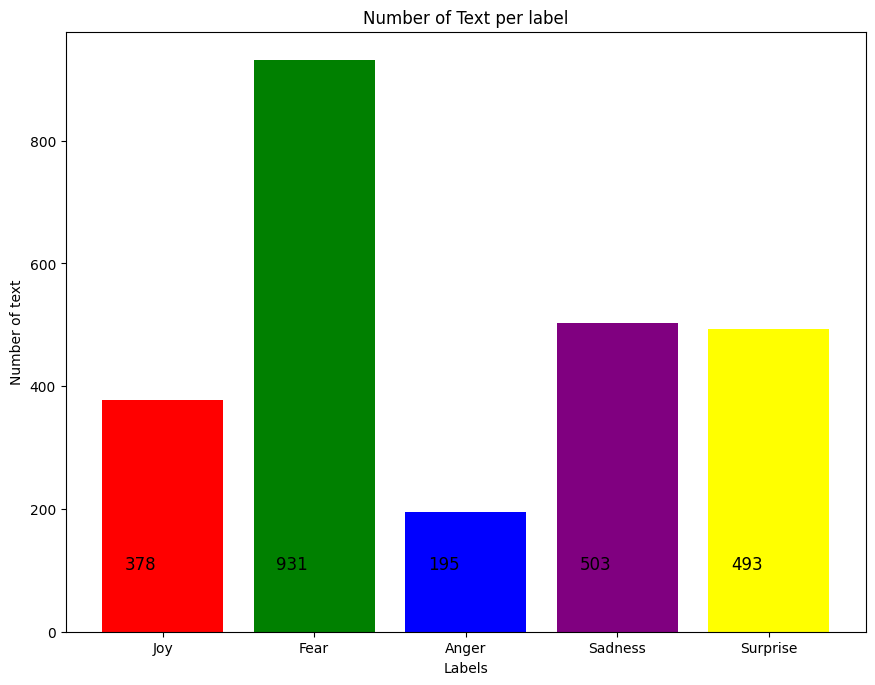

In [98]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_axes([0,0,1,1])
total_count = []
labels = ['Joy', 'Fear','Anger', 'Sadness', 'Surprise']
for label in labels:
    total_count.append(len(train_labels[train_labels[label] == 1]))
ax.bar(labels,total_count, color=['red', 'green', 'blue', 'purple','yellow'])
for i,data in enumerate(total_count):
    plt.text(i-.25,
              data/total_count[i]+100,
              total_count[i],
              fontsize=12)
plt.title('Number of Text per label')
plt.xlabel('Labels')
plt.ylabel('Number of text')

plt.show()

In [ ]:
NB_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', min_df=10, max_features=15000, max_df=.8, ngram_range=(1, 3))),
                       ('nb_model', OneVsRestClassifier(MultinomialNB(), n_jobs=-1))])

LR_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 3))),
                       ('lr_model', OneVsRestClassifier(LogisticRegression(), n_jobs=-1))])

SVM_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 3))),
                        ('svm_model', OneVsRestClassifier(SVC(kernel='linear',probability=True)))])

RF_pipeline = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', ngram_range=(1, 3))),
                        ('rf_model', OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42)))])

def run_pipeline(pipeline, train_feats, train_lbls, test_feats, test_lbls):
    pipeline.fit(train_feats, train_labels)
    predictions = pipeline.predict(test_feats)
    pred_proba = pipeline.predict_proba(test_feats)
    print('roc_auc: ', roc_auc_score(test_lbls, pred_proba))
    print('accuracy: ', accuracy_score(test_lbls, predictions))
    print('confusion matrices: ')
    print(multilabel_confusion_matrix(test_lbls, predictions))
    print('classification_report: ')
    print(classification_report(test_lbls, predictions, target_names=labels))

def run_SVM_pipeline(pipeline, train_feats, train_lbls, test_feats, test_lbls):
    pipeline.fit(train_feats, train_labels)
    predictions = pipeline.predict(test_feats)
    print('accuracy: ', accuracy_score(test_lbls, predictions))
    print('confusion matrices: ')
    print(multilabel_confusion_matrix(test_lbls, predictions))
    print('classification_report: ')
    print(classification_report(test_lbls, predictions, target_names=labels))

def plot_pipeline_roc_curve(pipeline, train_feats, train_lbls, test_feats, test_lbls):
    for label in labels:
        pipeline.fit(train_feats, train_data[label])
        pred_proba = pipeline.predict_proba(test_feats)[:,1]
        plot_roc_curve(test_lbls[label], pred_proba)


In [ ]:
run_pipeline(NB_pipeline, train_features_cleaned, train_labels, test_features_cleaned, test_labels)

roc_auc:  0.6409592498912199
accuracy:  0.1625
confusion matrices: 
[[[305   1]
  [ 94   0]]

 [[ 47 121]
  [ 46 186]]

 [[348   0]
  [ 52   0]]

 [[268   6]
  [116  10]]

 [[259  17]
  [ 96  28]]]
classification_report: 
              precision    recall  f1-score   support

         Joy       0.00      0.00      0.00        94
        Fear       0.61      0.80      0.69       232
       Anger       0.00      0.00      0.00        52
     Sadness       0.62      0.08      0.14       126
    Surprise       0.62      0.23      0.33       124

   micro avg       0.61      0.36      0.45       628
   macro avg       0.37      0.22      0.23       628
weighted avg       0.47      0.36      0.35       628
 samples avg       0.49      0.33      0.37       628



In [ ]:
run_pipeline(LR_pipeline, train_features_cleaned, train_labels, test_features_cleaned, test_labels)

roc_auc:  0.6841995754727224
accuracy:  0.165
confusion matrices: 
[[[306   0]
  [ 94   0]]

 [[ 30 138]
  [ 17 215]]

 [[348   0]
  [ 52   0]]

 [[269   5]
  [124   2]]

 [[272   4]
  [117   7]]]
classification_report: 
              precision    recall  f1-score   support

         Joy       0.00      0.00      0.00        94
        Fear       0.61      0.93      0.74       232
       Anger       0.00      0.00      0.00        52
     Sadness       0.29      0.02      0.03       126
    Surprise       0.64      0.06      0.10       124

   micro avg       0.60      0.36      0.45       628
   macro avg       0.31      0.20      0.17       628
weighted avg       0.41      0.36      0.30       628
 samples avg       0.54      0.34      0.40       628



In [ ]:
run_pipeline(SVM_pipeline, train_features_cleaned, train_labels, test_features_cleaned, test_labels)

roc_auc:  0.677732408599368
accuracy:  0.22
confusion matrices: 
[[[299   7]
  [ 80  14]]

 [[ 72  96]
  [ 46 186]]

 [[348   0]
  [ 51   1]]

 [[248  26]
  [ 96  30]]

 [[256  20]
  [ 94  30]]]
classification_report: 
              precision    recall  f1-score   support

         Joy       0.67      0.15      0.24        94
        Fear       0.66      0.80      0.72       232
       Anger       1.00      0.02      0.04        52
     Sadness       0.54      0.24      0.33       126
    Surprise       0.60      0.24      0.34       124

   micro avg       0.64      0.42      0.50       628
   macro avg       0.69      0.29      0.34       628
weighted avg       0.65      0.42      0.44       628
 samples avg       0.50      0.39      0.41       628



In [ ]:
run_pipeline(RF_pipeline, train_features_cleaned, train_labels, test_features_cleaned, test_labels) #best F1 score ( avg macro=0.35)

roc_auc:  0.6440579867968306
accuracy:  0.1975
confusion matrices: 
[[[296  10]
  [ 83  11]]

 [[ 57 111]
  [ 57 175]]

 [[347   1]
  [ 51   1]]

 [[253  21]
  [ 98  28]]

 [[205  71]
  [ 58  66]]]
classification_report: 
              precision    recall  f1-score   support

         Joy       0.52      0.12      0.19        94
        Fear       0.61      0.75      0.68       232
       Anger       0.50      0.02      0.04        52
     Sadness       0.57      0.22      0.32       126
    Surprise       0.48      0.53      0.51       124

   micro avg       0.57      0.45      0.50       628
   macro avg       0.54      0.33      0.35       628
weighted avg       0.56      0.45      0.45       628
 samples avg       0.48      0.41      0.42       628

